<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-Lineal/blob/main/Actividad_6_1_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Datos_limpios_EUA.csv")
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
3,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70


In [3]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [4]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [5]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6936 non-null   int64  
 1   listing_url                                   6936 non-null   object 
 2   last_scraped                                  6936 non-null   object 
 3   source                                        6936 non-null   object 
 4   name                                          6936 non-null   object 
 5   description                                   6936 non-null   object 
 6   neighborhood_overview                         6936 non-null   object 
 7   picture_url                                   6936 non-null   object 
 8   host_url                                      6936 non-null   object 
 9   host_name                                     6936 non-null   o

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.host_acceptance_rate vs host_response_rate**

In [7]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

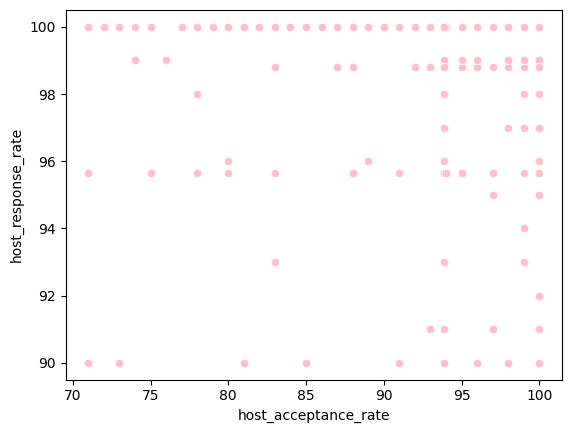

In [9]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)


In [10]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['host_response_rate']

In [11]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [12]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [13]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [14]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.07191932]),
 'rank_': 1,
 'singular_': array([335.40966142]),
 'intercept_': 91.83350403043221}

**Modelo matemático: y= 0.07191932x + 91.83350403043221**

In [15]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04953204731849603

In [16]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([97.08361474, 98.30624326, 98.58672862, ..., 99.0254365 ,
       98.16292041, 98.58672862])

In [17]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,97.083615,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
4,98.306243,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70
6,98.586729,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,https://www.airbnb.com/users/show/1269188,...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,99.025437,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/36752,...,5.00,4.86,5.00,4.90,4.46,2.0,0.0,2.0,0.0,0.12
11,99.025437,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,sin informacion,https://a0.muscache.com/pictures/915742/ada9fb...,https://www.airbnb.com/users/show/216682,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

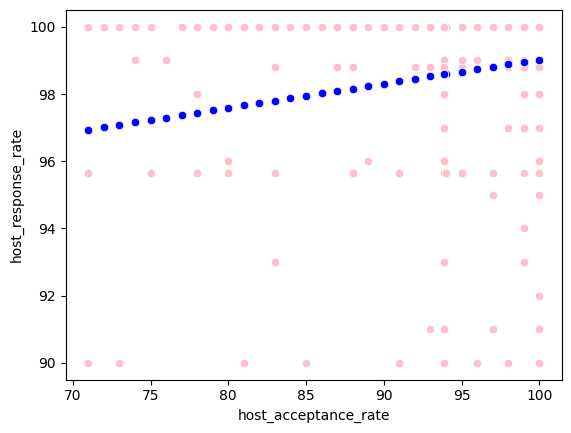

In [18]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=private_room)

In [19]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.04953204731849603
Coeficiente de correlación:  0.22255796395208155


## **2.host_acceptance_rate vs price**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

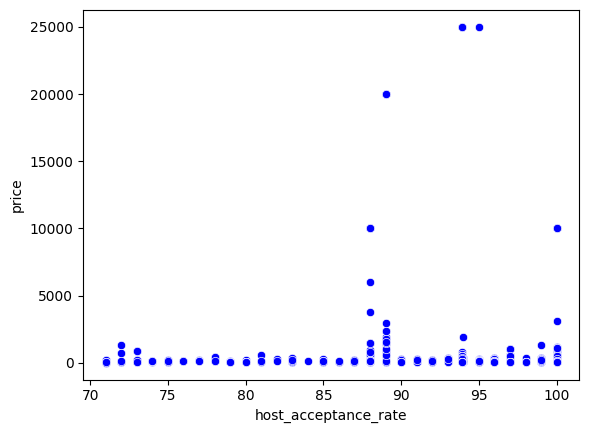

In [20]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="blue",data=private_room)

In [21]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['price']

In [22]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [23]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [24]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [25]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.48999842]),
 'rank_': 1,
 'singular_': array([335.40966142]),
 'intercept_': 475.7724769504982}

**Modelo matemático: y= -0.48999842x + 475.7724769504982**

In [26]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

2.8558841813630664e-06

In [27]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([440.00259263, 431.67261957, 429.76162575, ..., 426.77263541,
       432.64910215, 429.76162575])

In [28]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,440.002593,97.083615,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
4,431.672620,98.306243,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70
6,429.761626,98.586729,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,426.772635,99.025437,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,...,5.00,4.86,5.00,4.90,4.46,2.0,0.0,2.0,0.0,0.12
11,426.772635,99.025437,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,sin informacion,https://a0.muscache.com/pictures/915742/ada9fb...,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

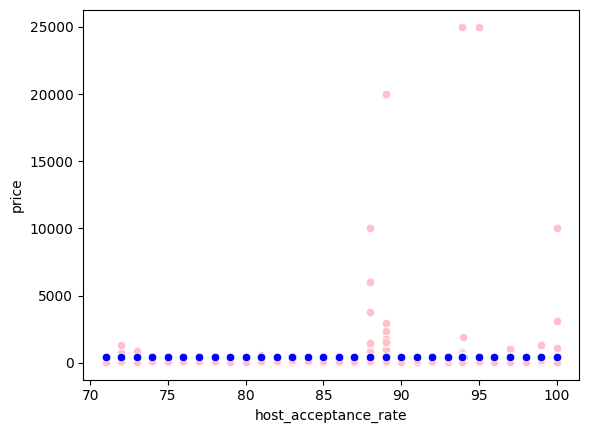

In [29]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="blue", data=private_room)

In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  2.8558841813630664e-06
Coeficiente de correlación:  0.001689936147125999


## **3. host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

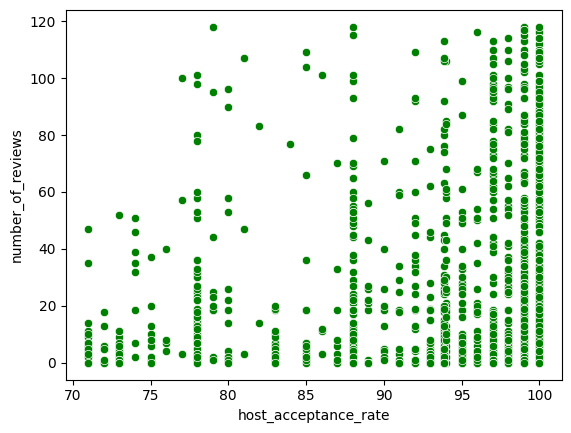

In [31]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="green",data=private_room)

In [32]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['number_of_reviews']

In [33]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [34]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [35]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [36]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.53070282]),
 'rank_': 1,
 'singular_': array([335.40966142]),
 'intercept_': -30.422110316162204}

**Modelo matemático: y=0.53070282x + -30.422110316162204**

In [37]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.018941366807301407

In [38]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([ 8.31919542, 17.34114333, 19.41088433, ..., 22.64817152,
       16.28354388, 19.41088433])

In [39]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,8.319195,440.002593,97.083615,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
4,17.341143,431.672620,98.306243,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70
6,19.410884,429.761626,98.586729,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,22.648172,426.772635,99.025437,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,sin informacion,...,5.00,4.86,5.00,4.90,4.46,2.0,0.0,2.0,0.0,0.12
11,22.648172,426.772635,99.025437,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,sin informacion,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

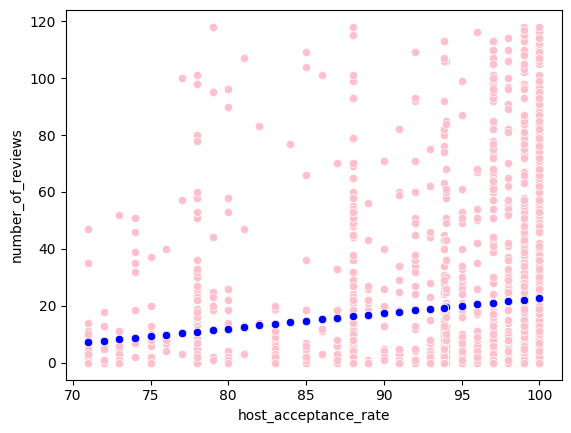

In [40]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="blue", data=private_room)

In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.018941366807301407
Coeficiente de correlación:  0.13762763823920474


## **4. review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

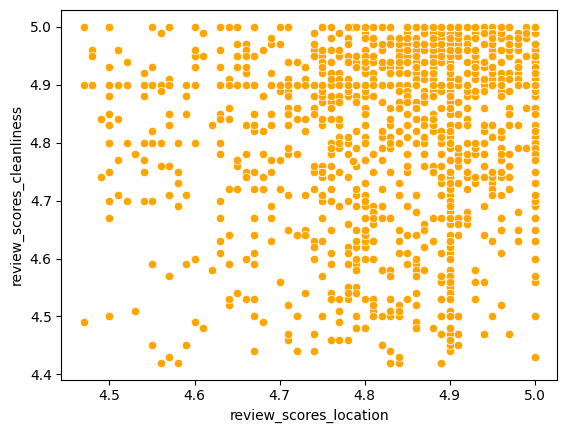

In [42]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="orange", data=private_room)

In [43]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['review_scores_location']]
Var_Dep= private_room['review_scores_cleanliness']

In [44]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [45]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.30836991]),
 'rank_': 1,
 'singular_': array([6.0574351]),
 'intercept_': 3.3420015019967853}

**Modelo matemático: y= 0.30836991x + 3.3420015019967853**

In [48]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.07340295356683801

In [49]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['review_scores_location']])
y_pred

array([4.78208896, 4.86226514, 4.81292595, ..., 4.81805938, 4.81805938,
       4.81805938])

In [50]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones4', y_pred)
private_room.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,4.782089,8.319195,440.002593,97.083615,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
4,4.862265,17.341143,431.672620,98.306243,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70
6,4.812926,19.410884,429.761626,98.586729,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,4.853014,22.648172,426.772635,99.025437,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,...,5.00,4.86,5.00,4.90,4.46,2.0,0.0,2.0,0.0,0.12
11,4.828344,22.648172,426.772635,99.025437,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

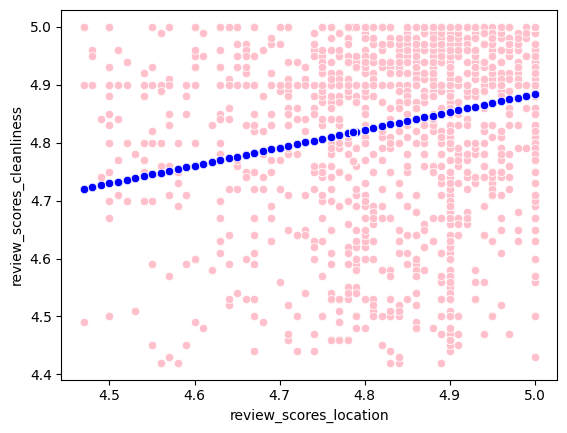

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=private_room)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="blue", data=private_room)

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.07340295356683801
Coeficiente de correlación:  0.270929794535112


## **5. availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

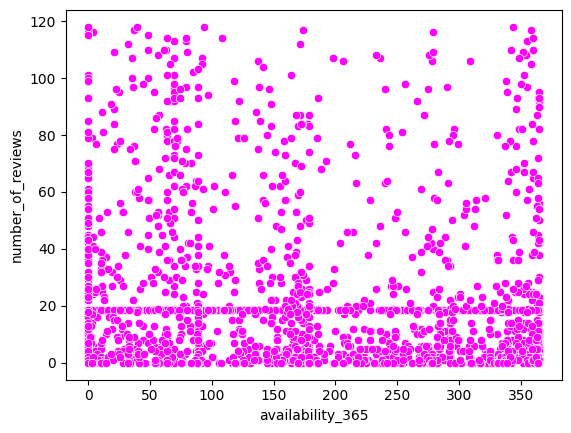

In [53]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=private_room)

In [54]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365']]
Var_Dep= private_room['number_of_reviews']

In [55]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [56]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [57]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [58]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02118341]),
 'rank_': 1,
 'singular_': array([6569.09513952]),
 'intercept_': 23.471125345823648}

**Modelo matematico : y=-0.02118341x + 23.471125345823648**

In [59]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.011576045280019764

In [60]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365']])
y_pred

array([15.73918088, 20.10296324, 16.4594168 , ..., 16.28994953,
       15.76036429, 19.67929505])

In [61]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones5', y_pred)
private_room.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,15.739181,4.782089,8.319195,440.002593,97.083615,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
4,20.102963,4.862265,17.341143,431.672620,98.306243,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath",...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70
6,16.459417,4.812926,19.410884,429.761626,98.586729,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,15.739181,4.853014,22.648172,426.772635,99.025437,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,...,5.00,4.86,5.00,4.90,4.46,2.0,0.0,2.0,0.0,0.12
11,22.306038,4.828344,22.648172,426.772635,99.025437,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

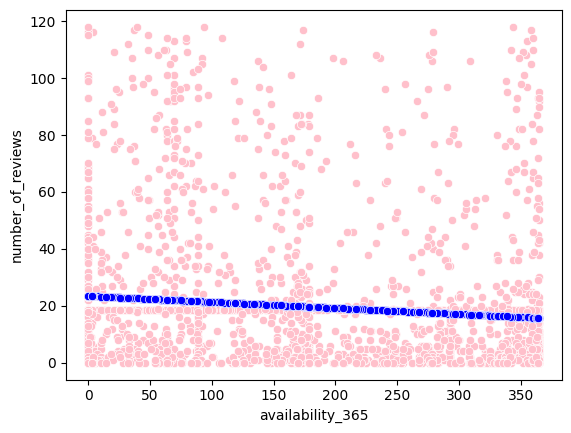

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=private_room)

In [63]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.011576045280019764
Coeficiente de correlación:  0.10759203167530468


## **6. reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

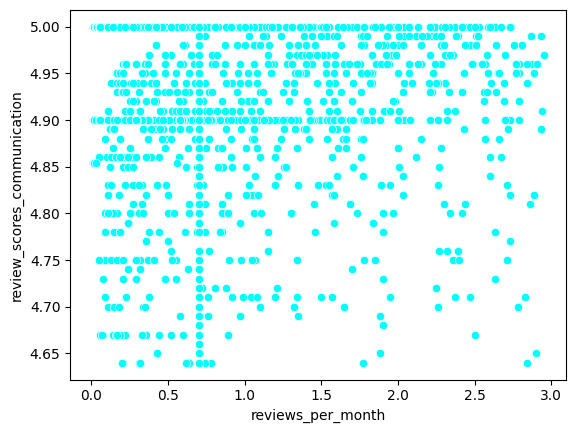

In [64]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="cyan",data=private_room)

In [65]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['reviews_per_month']]
Var_Dep= private_room['review_scores_communication']

In [66]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [67]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [68]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [69]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00891343]),
 'rank_': 1,
 'singular_': array([31.02775106]),
 'intercept_': 4.919908590944687}

**Modelo matematico: y = -0.00891343x + 4.919908590944687**

In [70]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0048041226932939995

In [71]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['reviews_per_month']])
y_pred

array([4.91910638, 4.91366919, 4.91331265, ..., 4.91491707, 4.91491707,
       4.91491707])

In [72]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones6', y_pred)
private_room.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,4.919106,15.739181,4.782089,8.319195,440.002593,97.083615,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
4,4.913669,20.102963,4.862265,17.341143,431.672620,98.306243,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70
6,4.913313,16.459417,4.812926,19.410884,429.761626,98.586729,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,4.918839,15.739181,4.853014,22.648172,426.772635,99.025437,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,...,5.00,4.86,5.00,4.90,4.46,2.0,0.0,2.0,0.0,0.12
11,4.912332,22.306038,4.828344,22.648172,426.772635,99.025437,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

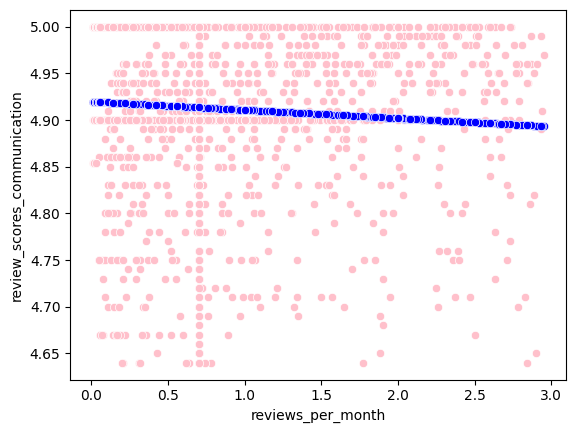

In [73]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=private_room)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="blue", data=private_room)

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0048041226932939995
Coeficiente de correlación:  0.06931177889286928


In [75]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(private_room)

In [76]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=private_room.corr()
Corr_Factors

<ipython-input-76-5346aab0bab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=private_room.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,-0.048360,0.115394,-0.233276,0.233276,-0.233276,0.018015,0.073266,0.088704,0.090905,...,0.011663,0.080801,0.069312,0.115394,0.078066,0.118215,0.131607,-0.072475,NaN,-1.000000
Predicciones5,-0.048360,1.000000,0.077998,-0.186001,0.186001,-0.186001,-0.142890,-0.073871,-0.011966,-0.052236,...,0.092690,0.087476,0.146595,0.077998,0.105365,-0.169102,0.087789,-0.020988,NaN,0.048360
Predicciones4,0.115394,0.077998,1.000000,-0.019093,0.019093,-0.019093,0.002581,-0.012264,0.010773,-0.004342,...,0.270930,0.311946,0.344445,1.000000,0.395051,0.001935,0.079838,-0.075306,NaN,-0.115394
Predicciones3,-0.233276,-0.186001,-0.019093,1.000000,-1.000000,1.000000,0.106166,-0.179522,-0.001690,0.037922,...,0.002956,0.013726,-0.021389,-0.019093,-0.011173,0.023170,-0.219739,0.076794,NaN,0.233276
Predicciones2,0.233276,0.186001,0.019093,-1.000000,1.000000,-1.000000,-0.106166,0.179522,0.001690,-0.037922,...,-0.002956,-0.013726,0.021389,0.019093,0.011173,-0.023170,0.219739,-0.076794,NaN,-0.233276
Predicciones,-0.233276,-0.186001,-0.019093,1.000000,-1.000000,1.000000,0.106166,-0.179522,-0.001690,0.037922,...,0.002956,0.013726,-0.021389,-0.019093,-0.011173,0.023170,-0.219739,0.076794,NaN,0.233276
Unnamed: 0,0.018015,-0.142890,0.002581,0.106166,-0.106166,0.106166,1.000000,-0.002707,0.032883,0.679246,...,0.083553,0.014819,-0.042086,0.002581,0.085550,0.140006,0.005228,0.014308,NaN,-0.018015
bathrooms_text,0.073266,-0.073871,-0.012264,-0.179522,0.179522,-0.179522,-0.002707,1.000000,0.002446,0.032499,...,-0.043122,-0.071194,-0.061732,-0.012264,-0.027480,0.050873,-0.011023,-0.031929,NaN,-0.073266
price,0.088704,-0.011966,0.010773,-0.001690,0.001690,-0.001690,0.032883,0.002446,1.000000,0.018366,...,-0.024203,-0.046061,-0.088120,0.010773,-0.043310,-0.047137,-0.056902,-0.053805,NaN,-0.088704
id,0.090905,-0.052236,-0.004342,0.037922,-0.037922,0.037922,0.679246,0.032499,0.018366,1.000000,...,0.052466,-0.003210,-0.068202,-0.004342,0.025760,0.131531,0.049329,0.004900,NaN,-0.090905


In [77]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.048360,0.115394,0.233276,0.233276,0.233276,0.018015,0.073266,0.088704,0.090905,...,0.011663,0.080801,0.069312,0.115394,0.078066,0.118215,0.131607,0.072475,NaN,1.000000
Predicciones5,0.048360,1.000000,0.077998,0.186001,0.186001,0.186001,0.142890,0.073871,0.011966,0.052236,...,0.092690,0.087476,0.146595,0.077998,0.105365,0.169102,0.087789,0.020988,NaN,0.048360
Predicciones4,0.115394,0.077998,1.000000,0.019093,0.019093,0.019093,0.002581,0.012264,0.010773,0.004342,...,0.270930,0.311946,0.344445,1.000000,0.395051,0.001935,0.079838,0.075306,NaN,0.115394
Predicciones3,0.233276,0.186001,0.019093,1.000000,1.000000,1.000000,0.106166,0.179522,0.001690,0.037922,...,0.002956,0.013726,0.021389,0.019093,0.011173,0.023170,0.219739,0.076794,NaN,0.233276
Predicciones2,0.233276,0.186001,0.019093,1.000000,1.000000,1.000000,0.106166,0.179522,0.001690,0.037922,...,0.002956,0.013726,0.021389,0.019093,0.011173,0.023170,0.219739,0.076794,NaN,0.233276
Predicciones,0.233276,0.186001,0.019093,1.000000,1.000000,1.000000,0.106166,0.179522,0.001690,0.037922,...,0.002956,0.013726,0.021389,0.019093,0.011173,0.023170,0.219739,0.076794,NaN,0.233276
Unnamed: 0,0.018015,0.142890,0.002581,0.106166,0.106166,0.106166,1.000000,0.002707,0.032883,0.679246,...,0.083553,0.014819,0.042086,0.002581,0.085550,0.140006,0.005228,0.014308,NaN,0.018015
bathrooms_text,0.073266,0.073871,0.012264,0.179522,0.179522,0.179522,0.002707,1.000000,0.002446,0.032499,...,0.043122,0.071194,0.061732,0.012264,0.027480,0.050873,0.011023,0.031929,NaN,0.073266
price,0.088704,0.011966,0.010773,0.001690,0.001690,0.001690,0.032883,0.002446,1.000000,0.018366,...,0.024203,0.046061,0.088120,0.010773,0.043310,0.047137,0.056902,0.053805,NaN,0.088704
id,0.090905,0.052236,0.004342,0.037922,0.037922,0.037922,0.679246,0.032499,0.018366,1.000000,...,0.052466,0.003210,0.068202,0.004342,0.025760,0.131531,0.049329,0.004900,NaN,0.090905


<Axes: >

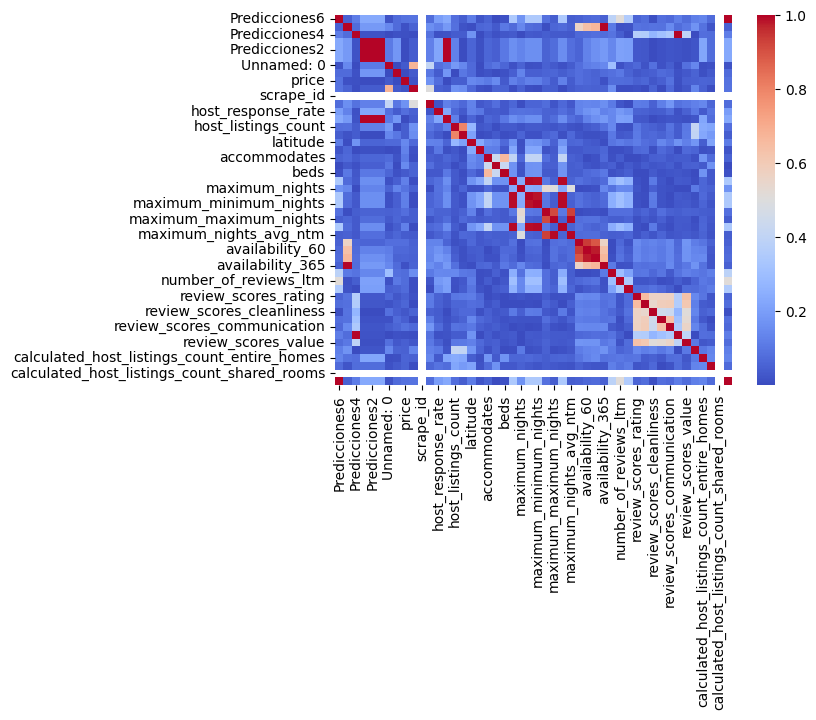

In [78]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

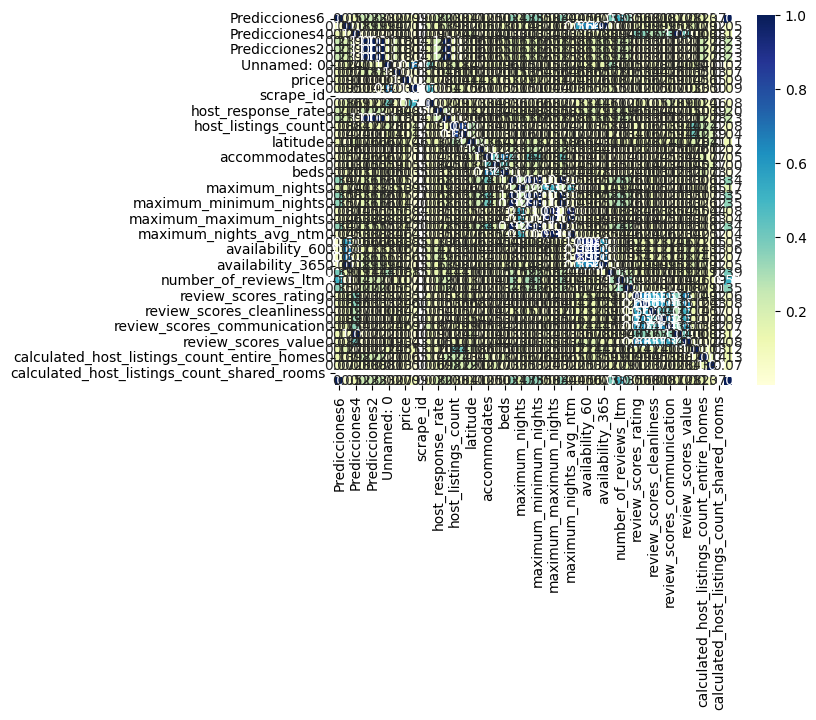

In [79]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

# **Tipo de habitación 2: Entire home/apt.**

In [80]:
df= pd.read_csv("Datos_limpios_EUA.csv")
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
3,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70


In [81]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [82]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [83]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [84]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce') 

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

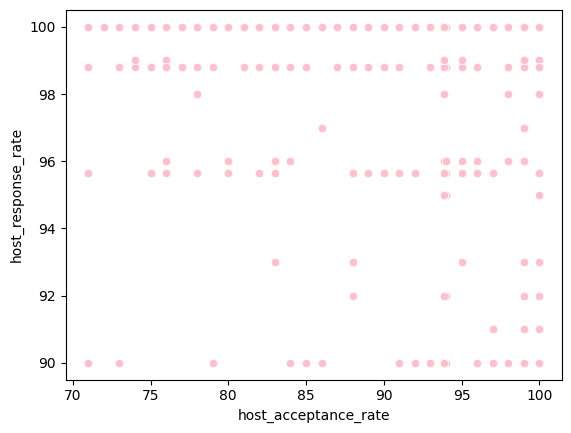

In [86]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)

In [87]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['host_response_rate']

In [88]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [89]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [90]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [91]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.03677412]),
 'rank_': 1,
 'singular_': array([491.26069292]),
 'intercept_': 95.43387134505247}

**Modelo matemático: y= 0.03677412x + 95.43387134505247**

In [92]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01441317141326881

In [93]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([99.11128299, 98.04483362, 98.88696088, ..., 99.11128299,
       98.67025734, 98.67025734])

In [94]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,99.111283,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,98.044834,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,98.886961,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,98.927412,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,98.886961,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

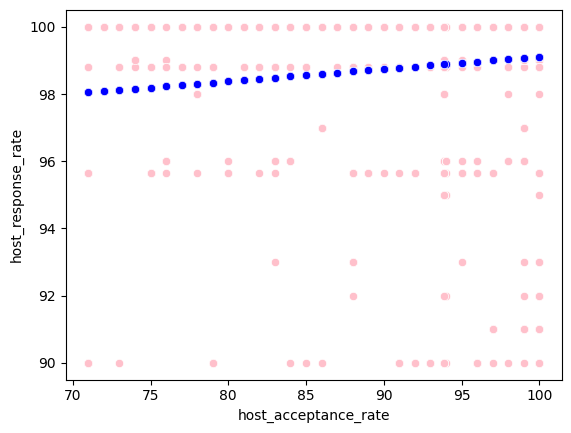

In [95]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

In [96]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.01441317141326881
Coeficiente de correlación:  0.12005486834472316


#**2. host_acceptance_rate vs price**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

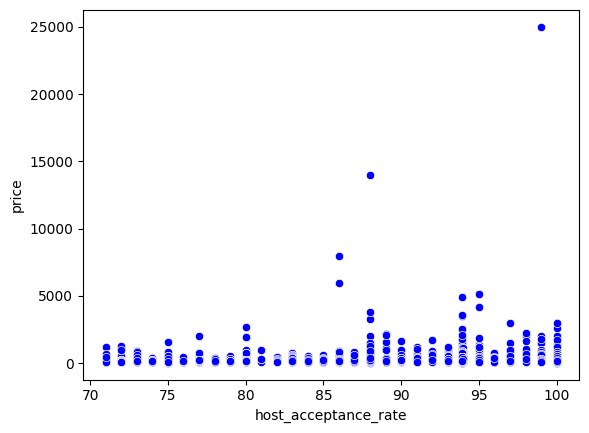

In [97]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="blue",data=enthome_apt)

In [98]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['price']

In [99]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [100]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [101]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [102]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.29521168]),
 'rank_': 1,
 'singular_': array([491.26069292]),
 'intercept_': 299.3195480587891}

**Modelo matemático: y= -0.29521168x + 299.3195480587891**

In [103]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.674561879994041e-05

In [104]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([269.79837985, 278.35951863, 271.59917111, ..., 269.79837985,
       273.33880279, 273.33880279])

In [105]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269.798380,99.111283,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,278.359519,98.044834,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,271.599171,98.886961,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,271.274438,98.927412,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,271.599171,98.886961,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

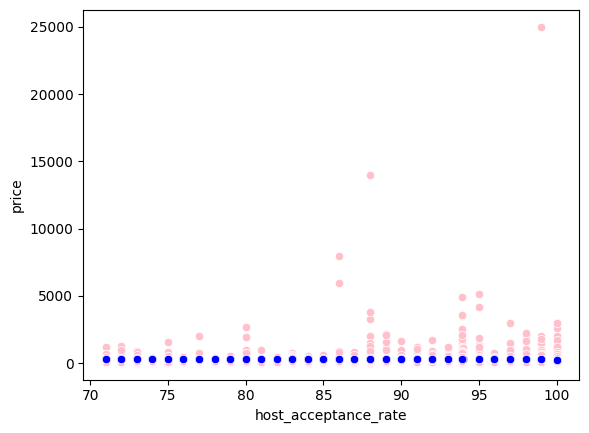

In [106]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="blue", data=enthome_apt)

In [107]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  1.674561879994041e-05
Coeficiente de correlación:  0.004092141102154276


# **3. host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

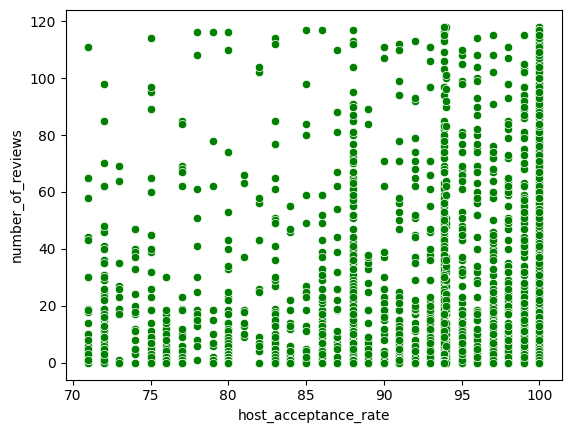

In [108]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="green",data=enthome_apt)

In [109]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['number_of_reviews']

In [110]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [111]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [112]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [113]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.28373213]),
 'rank_': 1,
 'singular_': array([491.26069292]),
 'intercept_': -8.832573299805464}

**Modelo matemático: y= 0.28373213x + -8.832573299805464**

In [114]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.007047267787196998

In [115]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([19.54063975, 11.31240796, 17.80987375, ..., 19.54063975,
       16.1378891 , 16.1378891 ])

In [116]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19.540640,269.798380,99.111283,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,11.312408,278.359519,98.044834,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,17.809874,271.599171,98.886961,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,sin informacion,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,18.121979,271.274438,98.927412,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,17.809874,271.599171,98.886961,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

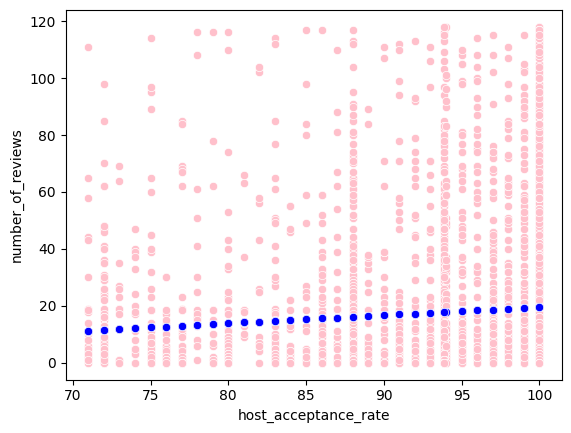

In [117]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="blue", data=enthome_apt)

In [118]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.007047267787196998
Coeficiente de correlación:  0.08394800645159478


## **4. review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

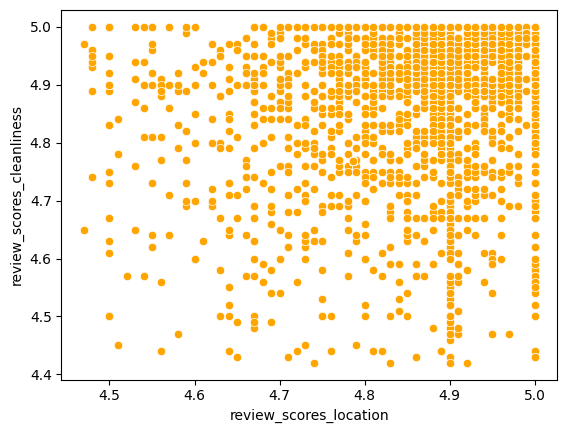

In [119]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="orange", data=enthome_apt)

In [120]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['review_scores_location']]
Var_Dep= enthome_apt['review_scores_cleanliness']

In [121]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [122]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [123]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [124]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.36869278]),
 'rank_': 1,
 'singular_': array([7.89898435]),
 'intercept_': 3.0692055551448028}

**Modelo matemático: y= 0.36869278x + 3.0692055551448028**

In [125]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1110623614801649

In [126]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['review_scores_location']])
y_pred

array([4.90529561, 4.82787013, 4.8905479 , ..., 4.83400775, 4.91266947,
       4.83400775])

In [127]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones4', y_pred)
enthome_apt.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.905296,19.540640,269.798380,99.111283,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,4.827870,11.312408,278.359519,98.044834,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,4.890548,17.809874,271.599171,98.886961,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,4.831557,18.121979,271.274438,98.927412,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,4.879487,17.809874,271.599171,98.886961,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

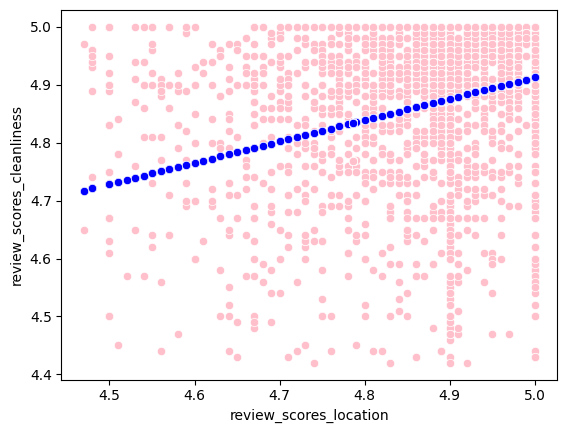

In [128]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="blue", data=enthome_apt)

In [129]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.1110623614801649
Coeficiente de correlación:  0.333260200864377


## **5. availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

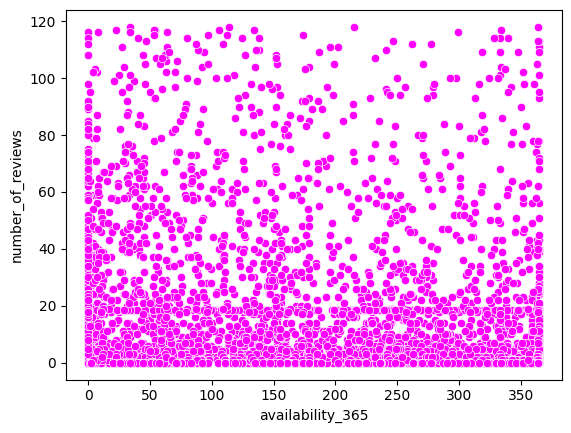

In [130]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=enthome_apt)

In [131]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365']]
Var_Dep= enthome_apt['number_of_reviews']

In [132]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [133]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [134]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [135]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02086498]),
 'rank_': 1,
 'singular_': array([8337.40811668]),
 'intercept_': 21.18233814210398}

**Modelo matematico : y=-0.02086498x + 21.18233814210398**

In [136]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01097685507017565

In [137]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365']])
y_pred

array([18.51162021, 13.56661904, 13.56661904, ..., 19.99303406,
       13.7544039 , 13.58748403])

In [138]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones5', y_pred)
enthome_apt.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18.511620,4.905296,19.540640,269.798380,99.111283,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,13.566619,4.827870,11.312408,278.359519,98.044834,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,13.566619,4.890548,17.809874,271.599171,98.886961,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,20.514659,4.831557,18.121979,271.274438,98.927412,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,21.036283,4.879487,17.809874,271.599171,98.886961,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

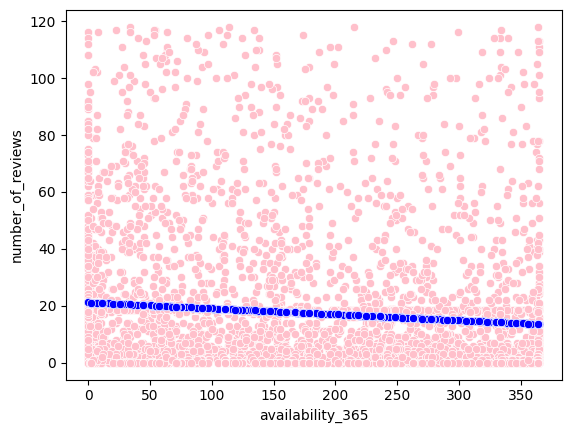

In [139]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=enthome_apt)

In [140]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.01097685507017565
Coeficiente de correlación:  0.10477048759157156


## **6. reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

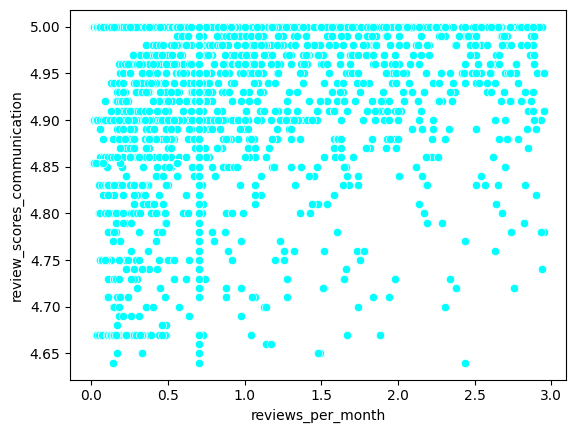

In [141]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="cyan",data=enthome_apt)

In [142]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['reviews_per_month']]
Var_Dep= enthome_apt['review_scores_communication']

In [143]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [144]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [145]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [146]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00046361]),
 'rank_': 1,
 'singular_': array([40.14075833]),
 'intercept_': 4.9287365899189455}

**Modelo matematico: y = -0.00046361x + 4.9287365899189455**

In [147]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.28260405574121e-05

In [148]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['reviews_per_month']])
y_pred

array([4.92766566, 4.92843061, 4.92865778, ..., 4.92847697, 4.92827298,
       4.92847697])

In [149]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones6', y_pred)
enthome_apt.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.927666,18.511620,4.905296,19.540640,269.798380,99.111283,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,4.928431,13.566619,4.827870,11.312408,278.359519,98.044834,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
3,4.928658,13.566619,4.890548,17.809874,271.599171,98.886961,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,4.927953,20.514659,4.831557,18.121979,271.274438,98.927412,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,4.928533,21.036283,4.879487,17.809874,271.599171,98.886961,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

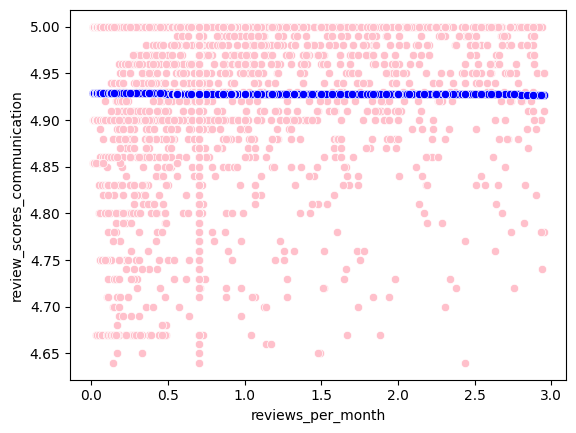

In [150]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=enthome_apt)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="blue", data=enthome_apt)

In [151]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  1.28260405574121e-05
Coeficiente de correlación:  0.0035813461934602327


In [152]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(enthome_apt)

In [153]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors1_1=enthome_apt.corr()
Corr_Factors1_1

<ipython-input-153-6cdc44a55d36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1_1=enthome_apt.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,-0.119870,0.124914,-0.119803,0.119803,-0.119803,-0.048648,0.012431,-0.010966,0.056800,...,-0.016779,0.011068,0.003581,0.124914,0.045559,0.154962,0.076930,0.019203,NaN,-1.000000
Predicciones5,-0.119870,1.000000,0.042293,-0.006073,0.006073,-0.006073,-0.050035,-0.009253,-0.018185,-0.002093,...,0.093756,0.121262,0.131340,0.042293,0.109005,-0.144145,-0.055914,-0.026225,NaN,0.119870
Predicciones4,0.124914,0.042293,1.000000,0.030808,-0.030808,0.030808,-0.002269,0.012815,0.017819,0.066238,...,0.333260,0.384585,0.377701,1.000000,0.401565,-0.015049,-0.001518,-0.030453,NaN,-0.124914
Predicciones3,-0.119803,-0.006073,0.030808,1.000000,-1.000000,1.000000,0.022768,0.036596,-0.004092,0.034552,...,0.057612,0.066579,0.060339,0.030808,0.022928,-0.118894,0.032972,-0.062066,NaN,0.119803
Predicciones2,0.119803,0.006073,-0.030808,-1.000000,1.000000,-1.000000,-0.022768,-0.036596,0.004092,-0.034552,...,-0.057612,-0.066579,-0.060339,-0.030808,-0.022928,0.118894,-0.032972,0.062066,NaN,-0.119803
Predicciones,-0.119803,-0.006073,0.030808,1.000000,-1.000000,1.000000,0.022768,0.036596,-0.004092,0.034552,...,0.057612,0.066579,0.060339,0.030808,0.022928,-0.118894,0.032972,-0.062066,NaN,0.119803
Unnamed: 0,-0.048648,-0.050035,-0.002269,0.022768,-0.022768,0.022768,1.000000,0.035692,0.030221,0.681024,...,0.015054,-0.018128,-0.061429,-0.002269,0.067413,0.106631,0.030089,-0.014368,NaN,0.048648
bathrooms_text,0.012431,-0.009253,0.012815,0.036596,-0.036596,0.036596,0.035692,1.000000,0.332712,-0.005533,...,0.026822,0.019599,0.044686,0.012815,0.016713,-0.051390,0.014455,0.014692,NaN,-0.012431
price,-0.010966,-0.018185,0.017819,-0.004092,0.004092,-0.004092,0.030221,0.332712,1.000000,-0.029782,...,0.011194,-0.000187,0.009522,0.017819,-0.015727,-0.034282,0.002823,-0.014290,NaN,0.010966
id,0.056800,-0.002093,0.066238,0.034552,-0.034552,0.034552,0.681024,-0.005533,-0.029782,1.000000,...,0.069210,0.059084,0.011767,0.066238,0.102078,0.128213,0.038578,0.027155,NaN,-0.056800


In [154]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors11= abs(Corr_Factors1_1)
Corr_Factors11

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.119870,0.124914,0.119803,0.119803,0.119803,0.048648,0.012431,0.010966,0.056800,...,0.016779,0.011068,0.003581,0.124914,0.045559,0.154962,0.076930,0.019203,NaN,1.000000
Predicciones5,0.119870,1.000000,0.042293,0.006073,0.006073,0.006073,0.050035,0.009253,0.018185,0.002093,...,0.093756,0.121262,0.131340,0.042293,0.109005,0.144145,0.055914,0.026225,NaN,0.119870
Predicciones4,0.124914,0.042293,1.000000,0.030808,0.030808,0.030808,0.002269,0.012815,0.017819,0.066238,...,0.333260,0.384585,0.377701,1.000000,0.401565,0.015049,0.001518,0.030453,NaN,0.124914
Predicciones3,0.119803,0.006073,0.030808,1.000000,1.000000,1.000000,0.022768,0.036596,0.004092,0.034552,...,0.057612,0.066579,0.060339,0.030808,0.022928,0.118894,0.032972,0.062066,NaN,0.119803
Predicciones2,0.119803,0.006073,0.030808,1.000000,1.000000,1.000000,0.022768,0.036596,0.004092,0.034552,...,0.057612,0.066579,0.060339,0.030808,0.022928,0.118894,0.032972,0.062066,NaN,0.119803
Predicciones,0.119803,0.006073,0.030808,1.000000,1.000000,1.000000,0.022768,0.036596,0.004092,0.034552,...,0.057612,0.066579,0.060339,0.030808,0.022928,0.118894,0.032972,0.062066,NaN,0.119803
Unnamed: 0,0.048648,0.050035,0.002269,0.022768,0.022768,0.022768,1.000000,0.035692,0.030221,0.681024,...,0.015054,0.018128,0.061429,0.002269,0.067413,0.106631,0.030089,0.014368,NaN,0.048648
bathrooms_text,0.012431,0.009253,0.012815,0.036596,0.036596,0.036596,0.035692,1.000000,0.332712,0.005533,...,0.026822,0.019599,0.044686,0.012815,0.016713,0.051390,0.014455,0.014692,NaN,0.012431
price,0.010966,0.018185,0.017819,0.004092,0.004092,0.004092,0.030221,0.332712,1.000000,0.029782,...,0.011194,0.000187,0.009522,0.017819,0.015727,0.034282,0.002823,0.014290,NaN,0.010966
id,0.056800,0.002093,0.066238,0.034552,0.034552,0.034552,0.681024,0.005533,0.029782,1.000000,...,0.069210,0.059084,0.011767,0.066238,0.102078,0.128213,0.038578,0.027155,NaN,0.056800


<Axes: >

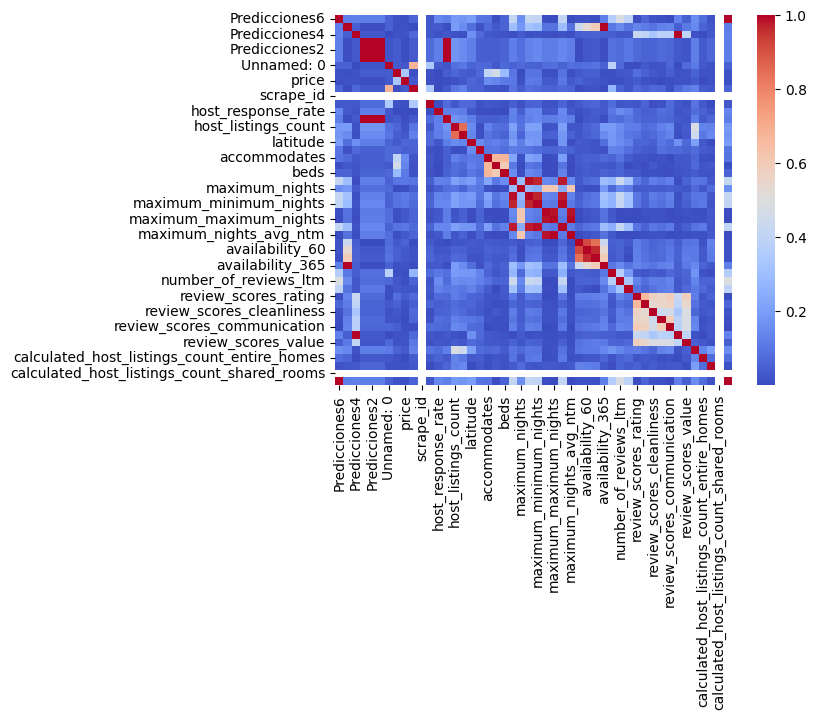

In [155]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map1= sns.heatmap(Corr_Factors11, cmap = 'coolwarm')  
Heat_Map1

<Axes: >

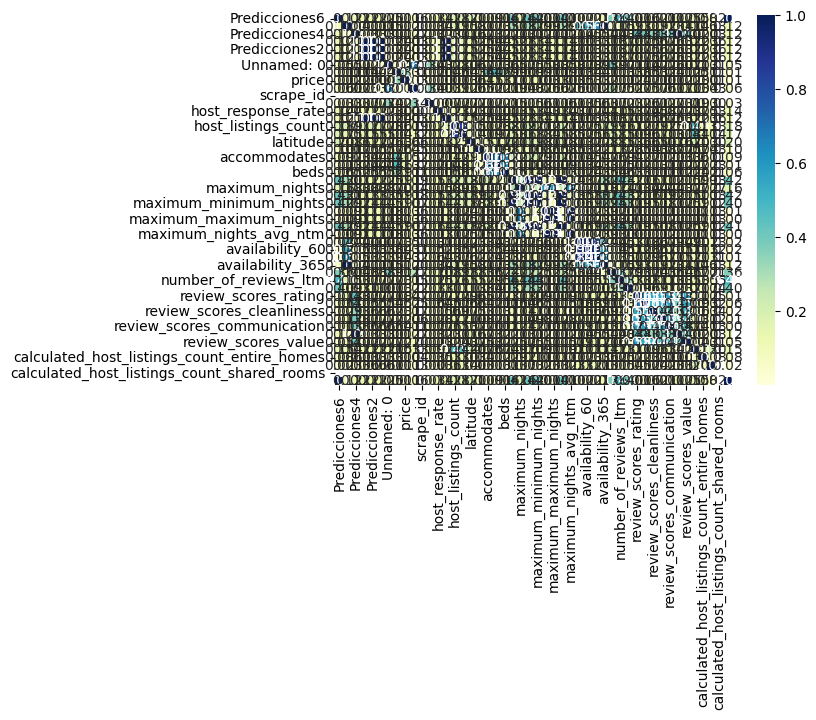

In [156]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map2= sns.heatmap(Corr_Factors11, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map2